In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
from racecar.SDRaceCar import SDRaceCar

np.set_printoptions(precision=4, suppress=True)

In [9]:
def getObservation():
    '''
    Returns observations from env
    :rtype: [x, y, theta], [x_dot, y_dot, theta_dot], h
    '''
    obs = env.get_observation()
    return obs[0:3], obs[3:6], obs[6]

def wrap_around(angle):
    n = np.floor(abs(angle)/2*np.pi)
#     print(angle, n)
    return angle - 2*n*np.pi

def mapToRange(t, fromRange, toRange):
    '''
    Maps input t from range [a,b] to [c,d]
    '''
    assert isinstance(fromRange, tuple) and len(fromRange) == 2
    assert isinstance(toRange, tuple) and len(toRange) == 2
    assert isinstance(t, (int, float))
    
    a, b = fromRange
    c, d = toRange
    
    f_t = c + ((d-c)/(b-a))*(t-a)
    return f_t

def getAction(K_thrust, K_angle, verbose=False):
    '''
    Calculate required thrust and wheel angle to navigate car
    :rtype: np.array of size (2,)
    '''
    pos, vel, h = getObservation()
    x_desired, y_desired = h[0], h[1]
    x, y, theta = pos[0], pos[1], pos[2]
    delta_x, delta_y = x_desired - x, y_desired - y
    
    # Calculated values
    gamma = np.arctan2(delta_y, delta_x) - theta
    delta_v = np.sqrt( (delta_x**2 + delta_y**2)/np.cos(gamma)**2 )
    
    #Control
    thrust = K_thrust * delta_v
#     thrust_normalized = (thrust/20 * 2) - 1
    thrust_normalized = mapToRange(thrust, (0,20), (-1,1))
    
    if thrust_normalized < -1: thrust_normalized = -1
    if thrust_normalized > 1: thrust_normalized = 1

    angle = gamma
    sx, sy = np.sign(delta_x), np.sign(delta_y)

    if sx == -1 and sy == -1 and not(-np.pi/2 <= angle <= np.pi/2):
        angle += 2*np.pi
    if sx == -1 and sy == 1 and not(-np.pi/2 <= angle <= np.pi/2):
        n = np.ceil(abs(angle) / (2*np.pi))
        angle -= (2*n*np.pi)
    
    angle = mapToRange(angle, (-np.pi/2, np.pi/2), (-1,1))
    angle = K_angle * angle
    
    if verbose:
        print('x, y,  delta_x, delta_y, angle = ', np.sign(delta_x), np.sign(delta_y), delta_x, delta_y, angle*(180.0/np.pi))
    
    return np.array([angle, thrust_normalized]) #size (2,)

In [10]:
# env = SDRaceCar(render_env=False, track='Circle')
# state = env.reset()
# previous_ind = 0
# steps = 0
# done = False

# plot_track = True
# env.x, env.y = state[-1]
# actual_traj, desired_traj = [state[-1]], [state[-1]]
# while not done:
#     action = getAction(K_thrust = 2.0, K_angle = 1.5, verbose=False)
#     obs,r,done = env.step(action)
#     steps +=1
#     current_ind = env.closest_track_ind
#     # CONDITION TO CHECK lap-completion
#     if current_ind - previous_ind<=-500:
#         done = True
#     previous_ind = current_ind
#     actual_traj.append([obs[0], obs[1]])
#     desired_traj.append(list(obs[6]))

# print('Steps taken = {0}'.format(steps))
    
# if plot_track:
#     fig, ax = subplots(figsize=(9, 6))
#     desired_traj, actual_traj = np.array(desired_traj), np.array(actual_traj)
#     ax.plot(desired_traj[:,0], desired_traj[:,1], 'or--')
#     ax.plot(actual_traj[:,0], actual_traj[:,1], '-b')
#     ax.legend(('desired','actual'),loc='best')

x, y,  delta_x, delta_y, angle =  0.0 0.0 0.0 0.0 0.0
x, y,  delta_x, delta_y, angle =  1.0 -1.0 2.467608196299379 -2.331032023553605 -27.61002138333082
x, y,  delta_x, delta_y, angle =  1.0 -1.0 2.467608196299379 -2.331032023553605 -27.61002138333082
x, y,  delta_x, delta_y, angle =  1.0 -1.0 2.467608196299379 -2.331032023553605 -27.61002138333082
x, y,  delta_x, delta_y, angle =  1.0 -1.0 2.4704885606415448 -2.3202977148064066 -26.803777385387836
x, y,  delta_x, delta_y, angle =  1.0 -1.0 2.4887695589864354 -2.3298733076849762 -27.42667434775855
x, y,  delta_x, delta_y, angle =  1.0 -1.0 2.485585274992452 -2.318964170637829 -26.66359274466788
x, y,  delta_x, delta_y, angle =  1.0 -1.0 2.4736808924286398 -2.306438921439959 -27.340152709403043
x, y,  delta_x, delta_y, angle =  1.0 -1.0 2.4889545756301783 -2.3174033907179177 -26.61780417214773
x, y,  delta_x, delta_y, angle =  1.0 -1.0 2.4712004883124914 -2.3047835923039295 -27.341743326760124
x, y,  delta_x, delta_y, angle =  1.0 -1.0 

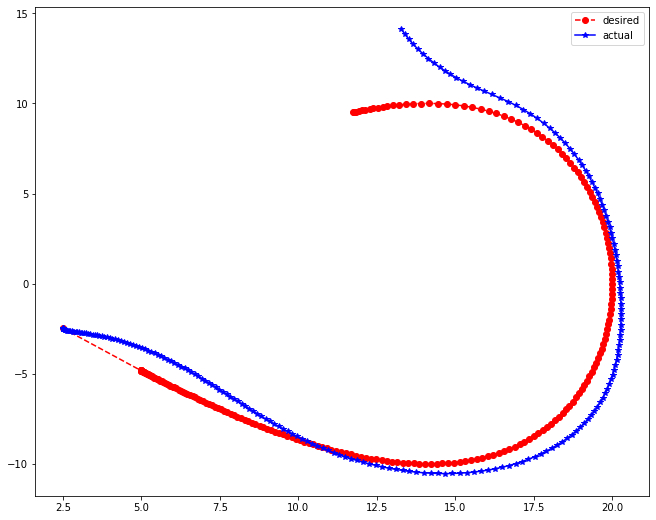

In [11]:
tracks = ['Linear', 'Circle', 'FigureEight']
env = SDRaceCar(render_env=False, track=tracks[2])
state = env.reset()
previous_ind = 0
steps = 0
done = False

plot_track = True
env.x, env.y = state[-1]
actual_traj, desired_traj = [state[-1]], [state[-1]]
while not done:
    action = getAction(K_thrust = 0.45, K_angle = 1.0, verbose=True)
    obs,r,done = env.step(action)
    steps +=1
    current_ind = env.closest_track_ind
    # CONDITION TO CHECK lap-completion
    if current_ind - previous_ind<=-500:
        done = True
    previous_ind = current_ind
    actual_traj.append([obs[0], obs[1]])
    desired_traj.append(list(obs[6]))

print('Steps taken = {0}'.format(steps))
    
if plot_track:
    fig, ax = subplots(figsize=(11, 9))
    desired_traj, actual_traj = np.array(desired_traj), np.array(actual_traj)
    ax.plot(desired_traj[:,0], desired_traj[:,1], 'or--')
    ax.plot(actual_traj[:,0], actual_traj[:,1], '*-b')
    ax.legend(('desired','actual'),loc='best')
    
# K_thrust = 0.45, K_angle = 1.0 - works for eight
# K_thrust = 0.6, K_angle = 1.0 - works for circle